Epoch 1/100
90/90 [==============================] - 5s 11ms/step - loss: 0.1124 - val_loss: 0.0304
Epoch 2/100
90/90 [==============================] - 0s 4ms/step - loss: 0.0561 - val_loss: 0.0173
Epoch 3/100
90/90 [==============================] - 0s 4ms/step - loss: 0.0445 - val_loss: 0.0157
Epoch 4/100
90/90 [==============================] - 0s 4ms/step - loss: 0.0357 - val_loss: 0.0155
Epoch 5/100
90/90 [==============================] - 0s 4ms/step - loss: 0.0295 - val_loss: 0.0154
Epoch 6/100
90/90 [==============================] - 0s 4ms/step - loss: 0.0244 - val_loss: 0.0147
Epoch 7/100
90/90 [==============================] - 0s 4ms/step - loss: 0.0214 - val_loss: 0.0125
Epoch 8/100
90/90 [==============================] - 0s 4ms/step - loss: 0.0188 - val_loss: 0.0112
Epoch 9/100
90/90 [==============================] - 0s 4ms/step - loss: 0.0165 - val_loss: 0.0100
Epoch 10/100
90/90 [==============================] - 0s 4ms/step - loss: 0.0151 - val_loss: 0.0090
Epoch 11

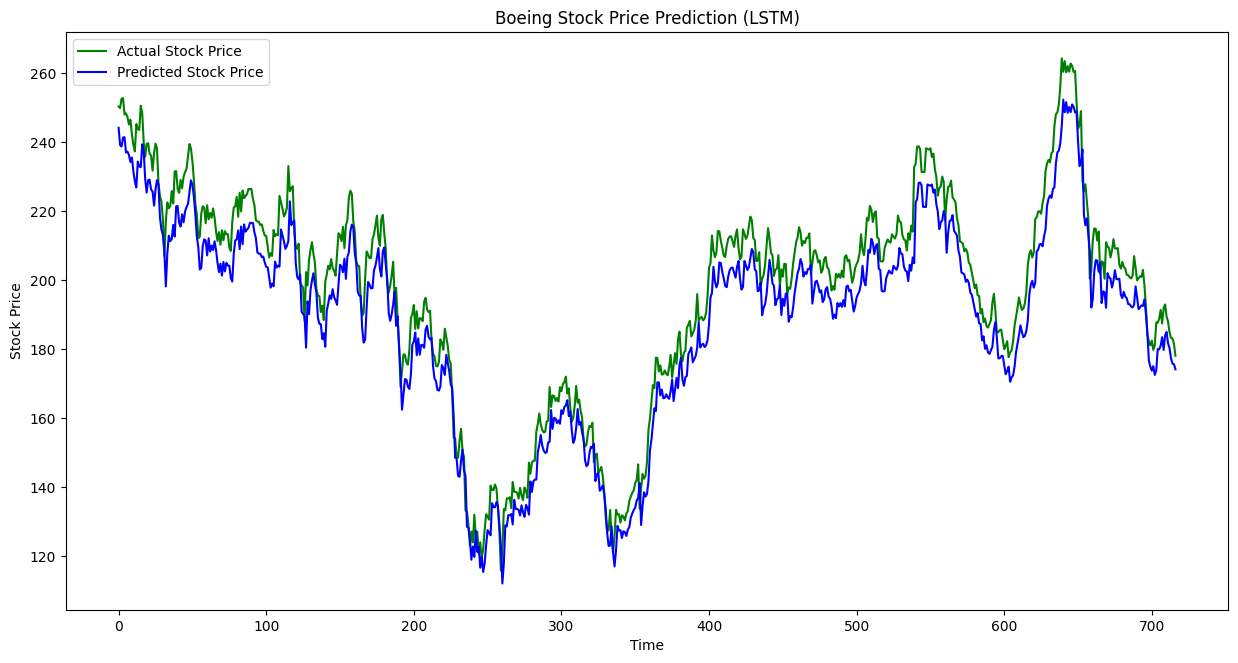

Mean Absolute Error (MAE): 8.378752491630438


In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout #this saves so much work 😭
from keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import numpy as np
from tensorflow.keras.regularizers import l2



stocks_df = pd.read_csv('sp500_stocks.csv')
stocks_df = pd.DataFrame(stocks_df, columns=['Date', 'Symbol', 'Close'])
stock_codes = ['BA']
stocks_df = stocks_df.loc[stocks_df['Symbol'].isin(stock_codes)]
stocks_df
train_df = stocks_df[:int(len(stocks_df) * .8)]
test_df = stocks_df[int(len(stocks_df) * .8):]
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train_data = scaler.fit_transform(train_df['Close'].values.reshape(-1,1))
scaled_test_data = scaler.transform(test_df['Close'].values.reshape(-1,1))
X_train = scaled_train_data[:-1]
y_train = scaled_train_data[1:]
X_test = scaled_test_data[:-1]
y_test = scaled_test_data[1:]
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
model = Sequential([
    LSTM(30, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2]), kernel_regularizer=l2(0.02)),
    Dropout(0.5),
    Dense(1)])
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
#train and fit

model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)
#predict and then inverts
predicted_stock_price = model.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)
actual_stock_price = scaler.inverse_transform(y_test.reshape(-1, 1))
#graph
plt.figure(figsize=(15, 7.5))
plt.plot(actual_stock_price, color='green', label='Actual Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Stock Price')
plt.title('Boeing Stock Price Prediction (LSTM)')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
mae = mean_absolute_error(actual_stock_price, predicted_stock_price)
print(f"Mean Absolute Error (MAE): {mae}")


Epoch 1/100
90/90 [==============================] - 3s 14ms/step - loss: 0.0435 - val_loss: 1.8711
Epoch 2/100
90/90 [==============================] - 1s 8ms/step - loss: 0.0135 - val_loss: 0.1755
Epoch 3/100
90/90 [==============================] - 1s 7ms/step - loss: 0.0011 - val_loss: 0.0265
Epoch 4/100
90/90 [==============================] - 1s 6ms/step - loss: 1.4645e-04 - val_loss: 0.0342
Epoch 5/100
90/90 [==============================] - 1s 7ms/step - loss: 1.3935e-04 - val_loss: 0.0319
Epoch 6/100
90/90 [==============================] - 0s 4ms/step - loss: 1.3424e-04 - val_loss: 0.0272
Epoch 7/100
90/90 [==============================] - 0s 4ms/step - loss: 1.2931e-04 - val_loss: 0.0232
Epoch 8/100
90/90 [==============================] - 0s 4ms/step - loss: 1.2583e-04 - val_loss: 0.0201
Epoch 9/100
90/90 [==============================] - 0s 4ms/step - loss: 1.1917e-04 - val_loss: 0.0183
Epoch 10/100
90/90 [==============================] - 0s 4ms/step - loss: 1.1423e-04

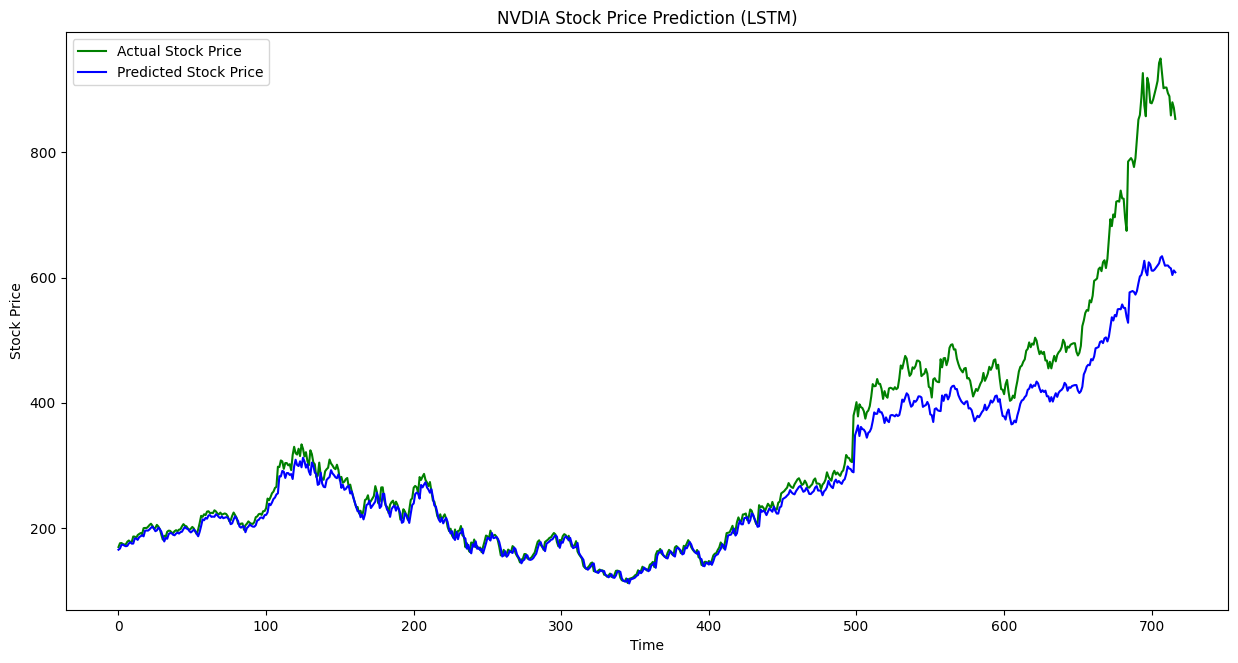

Mean Absolute Error (MAE): 34.78411478976326


In [2]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense #this saves so much work 😭
from keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import numpy as np


stocks_df = pd.read_csv('sp500_stocks.csv')
stocks_df = pd.DataFrame(stocks_df, columns=['Date', 'Symbol', 'Close'])
stock_codes = ['NVDA']
stocks_df = stocks_df.loc[stocks_df['Symbol'].isin(stock_codes)]
stocks_df
train_df = stocks_df[:int(len(stocks_df) * .8)]
test_df = stocks_df[int(len(stocks_df) * .8):]
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train_data = scaler.fit_transform(train_df['Close'].values.reshape(-1,1))
scaled_test_data = scaler.transform(test_df['Close'].values.reshape(-1,1))
X_train = scaled_train_data[:-1]
y_train = scaled_train_data[1:]
X_test = scaled_test_data[:-1]
y_test = scaled_test_data[1:]
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
model = Sequential()
model.add(LSTM(50, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
#train and fit
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)
#predict and then inverts
predicted_stock_price = model.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)
actual_stock_price = scaler.inverse_transform(y_test.reshape(-1, 1))
#graph
plt.figure(figsize=(15, 7.5))
plt.plot(actual_stock_price, color='green', label='Actual Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Stock Price')
plt.title('NVDIA Stock Price Prediction (LSTM)')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
mae = mean_absolute_error(actual_stock_price, predicted_stock_price)
print(f"Mean Absolute Error (MAE): {mae}")

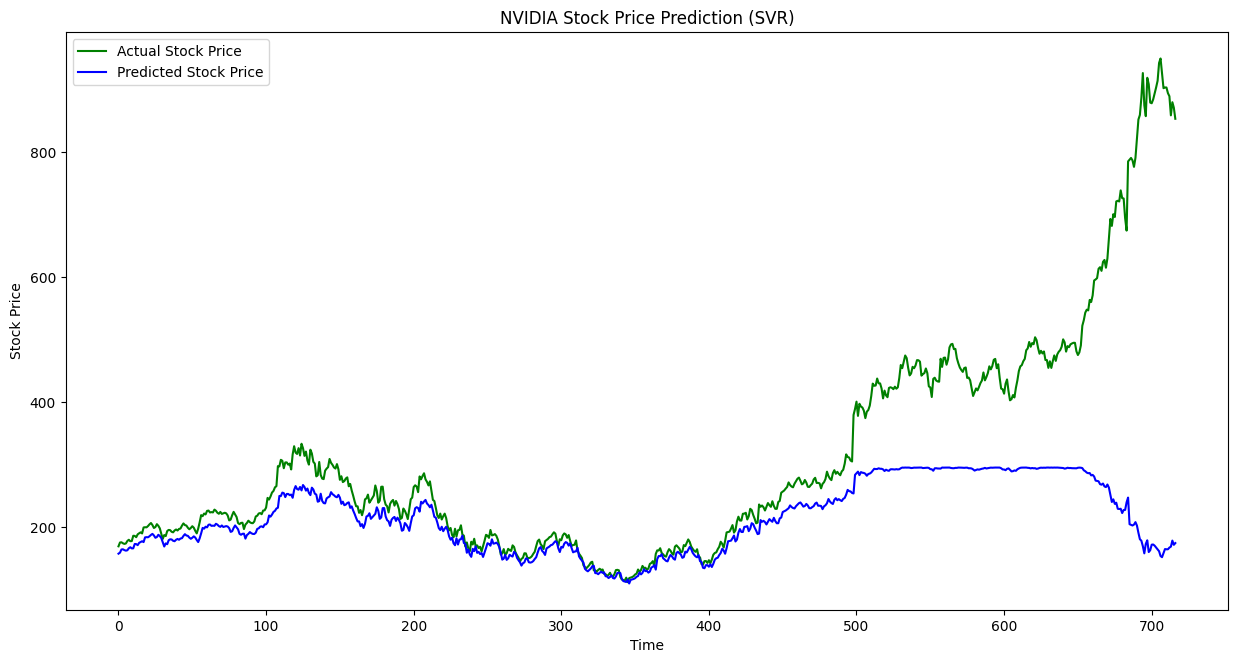

Mean Absolute Error (MAE): 96.4481072816948


In [3]:
from sklearn.svm import SVR

stocks_df = pd.read_csv('sp500_stocks.csv')
stocks_df = pd.DataFrame(stocks_df, columns=['Date', 'Symbol', 'Close'])
stock_codes = ['NVDA']
stocks_df = stocks_df.loc[stocks_df['Symbol'].isin(stock_codes)]
stocks_df

train_df = stocks_df[:int(len(stocks_df) * .8)]
test_df = stocks_df[int(len(stocks_df) * .8):]

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train_data = scaler.fit_transform(train_df['Close'].values.reshape(-1,1))
scaled_test_data = scaler.transform(test_df['Close'].values.reshape(-1,1))

X_train = scaled_train_data[:-1]
y_train = scaled_train_data[1:].ravel()
X_test = scaled_test_data[:-1]
y_test = scaled_test_data[1:].ravel()

svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr_model.fit(X_train, y_train)

predicted_stock_price = svr_model.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price.reshape(-1, 1))
actual_stock_price = scaler.inverse_transform(y_test.reshape(-1, 1))

plt.figure(figsize=(15, 7.5))
plt.plot(actual_stock_price, color='green', label='Actual Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Stock Price')
plt.title('NVIDIA Stock Price Prediction (SVR)')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
mae = mean_absolute_error(actual_stock_price, predicted_stock_price)
print(f"Mean Absolute Error (MAE): {mae}")

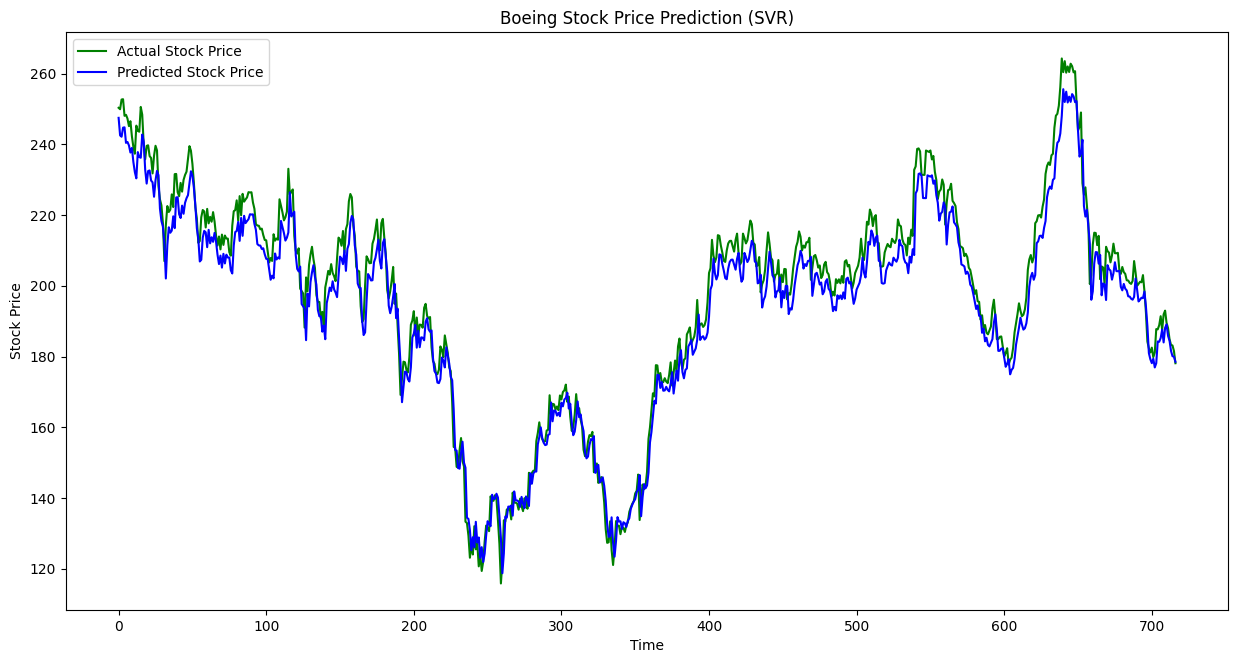

Mean Absolute Error (MAE): 5.136412842921479


In [4]:
from sklearn.svm import SVR

stocks_df = pd.read_csv('sp500_stocks.csv')
stocks_df = pd.DataFrame(stocks_df, columns=['Date', 'Symbol', 'Close'])
stock_codes = ['BA']
stocks_df = stocks_df.loc[stocks_df['Symbol'].isin(stock_codes)]
stocks_df

train_df = stocks_df[:int(len(stocks_df) * .8)]
test_df = stocks_df[int(len(stocks_df) * .8):]

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train_data = scaler.fit_transform(train_df['Close'].values.reshape(-1,1))
scaled_test_data = scaler.transform(test_df['Close'].values.reshape(-1,1))

X_train = scaled_train_data[:-1]
y_train = scaled_train_data[1:].ravel()
X_test = scaled_test_data[:-1]
y_test = scaled_test_data[1:].ravel()

svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr_model.fit(X_train, y_train)

predicted_stock_price = svr_model.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price.reshape(-1, 1))
actual_stock_price = scaler.inverse_transform(y_test.reshape(-1, 1))

plt.figure(figsize=(15, 7.5))
plt.plot(actual_stock_price, color='green', label='Actual Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Stock Price')
plt.title('Boeing Stock Price Prediction (SVR)')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
mae = mean_absolute_error(actual_stock_price, predicted_stock_price)
print(f"Mean Absolute Error (MAE): {mae}")